# Import

In [4]:
import os
import pandas as pd
import numpy as np
import importlib
import evaluator
importlib.reload(evaluator) 
from evaluator import ModelEvaluator
import matplotlib.pyplot as plt

# Regular

[51.90844  84.488914 57.981945 58.485435 63.09813  45.51094  62.40195
 65.87148  59.08618  66.89933  51.42286  59.605774 68.45025  59.40877
 66.15306  50.012222 53.08957  66.354774 63.757225 62.061726 69.69738
 80.89945  71.53156  69.03668  55.832085 64.68454  68.638435 56.335236
 62.95479  65.548615 66.75777  64.35531  66.82762  60.104908 70.257614
 63.504143 61.428043 61.30252  77.52774  65.349    61.8366   77.235245
 81.303154 63.215233 67.04207  61.325844 64.15573  49.190228 77.92277
 79.30745  64.51063  60.947098 61.536762 73.45884  84.60394  61.083332
 65.555244 56.935287 67.60245  76.81702  74.157524 61.78428  50.111443
 82.029    67.76568  64.9541   70.340706 75.41123  64.82582  61.25094
 65.326065 58.908665 54.571377 61.602432 62.50398  83.32823  52.623875
 66.71945  64.12597  49.294083 59.820843 81.61512  62.039417 72.02244
 64.67947 ]
[ 15.        20.000002  27.000002  74.00001   24.999998  32.000004
 203.        93.000015   8.        85.99999  117.00001   68.
  34.000004  2

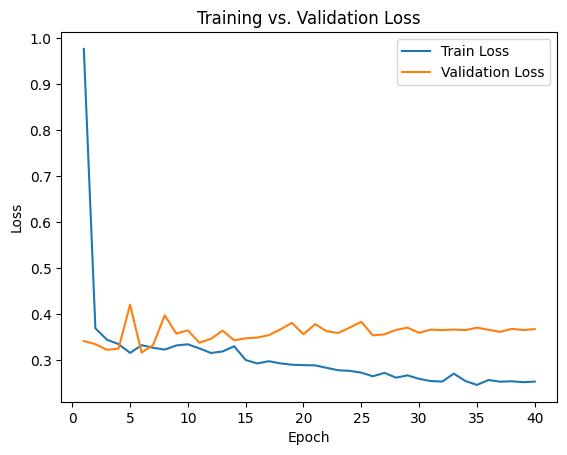

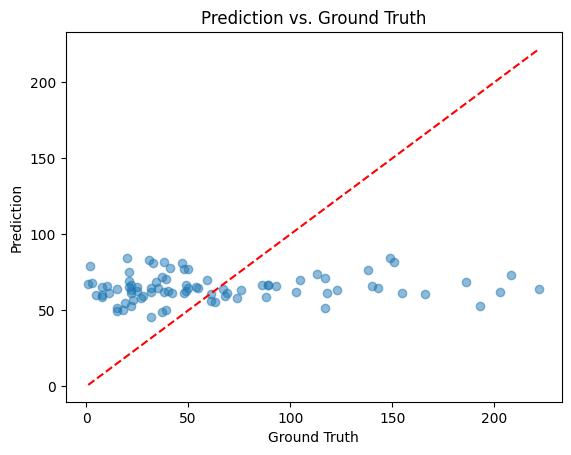

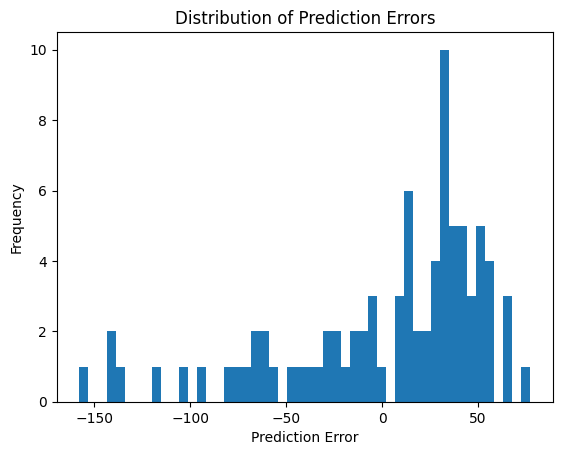

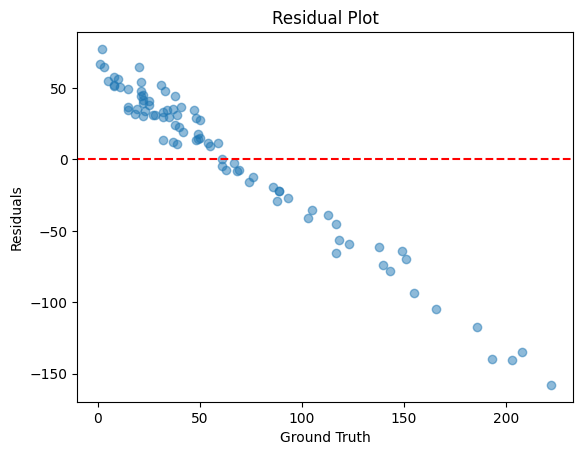

MAE : 43.2823
MSE : 2881.3574
RMSE: 53.6783
R²  : 0.0056
📉 Std: 8.5907 | Unique values (2 decimal): 84
✅ Prediction distribution looks ok.


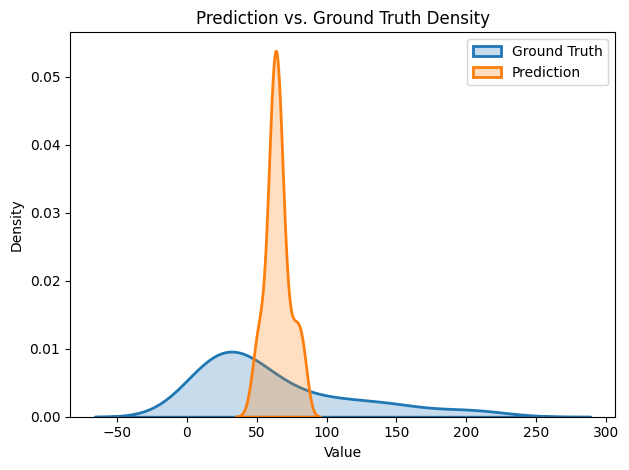

In [5]:
import yaml
with open("config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)
    
loss_type = config["loss_type"]
learning_rate = config["lr"]

predictions = np.load("result/predictions.npy")
predictions = np.expm1(predictions)  
ground_truth = np.load("result/ground_truth.npy")
ground_truth = np.expm1(ground_truth)

train_log_path = f"./train_logs/train_logs_{loss_type}_lr{learning_rate}.json"


# 建立 evaluator
evaluator = ModelEvaluator(predictions, ground_truth, train_log_path)
# 顯示預測和真實值
print(predictions)
print(ground_truth)

# 畫圖
evaluator.plot_loss_curve()
evaluator.plot_prediction_vs_truth()
evaluator.plot_error_distribution()
evaluator.residual_plot()
evaluator.evaluate_metrics()
evaluator.check_prediction_std()
evaluator.plot_prediction_truth_density()

# K-fold

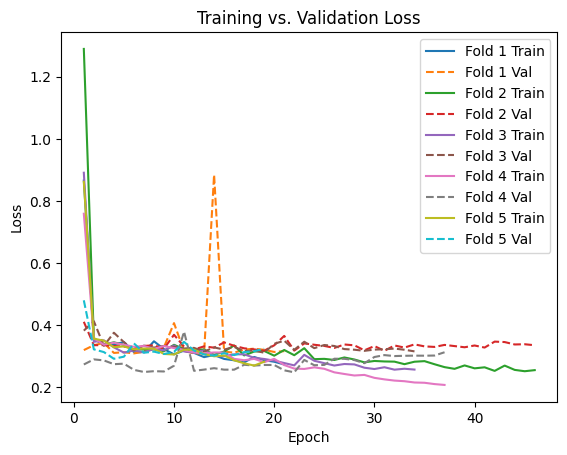

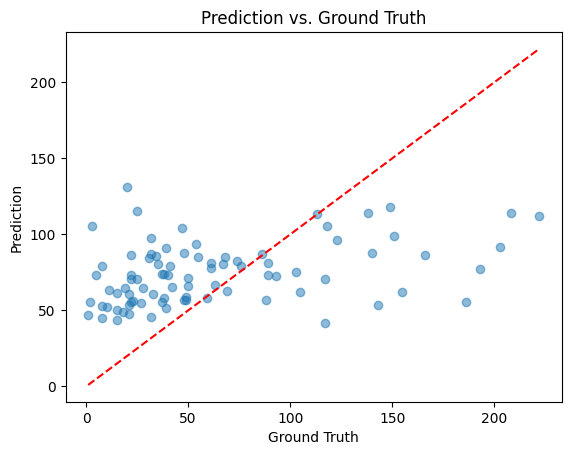

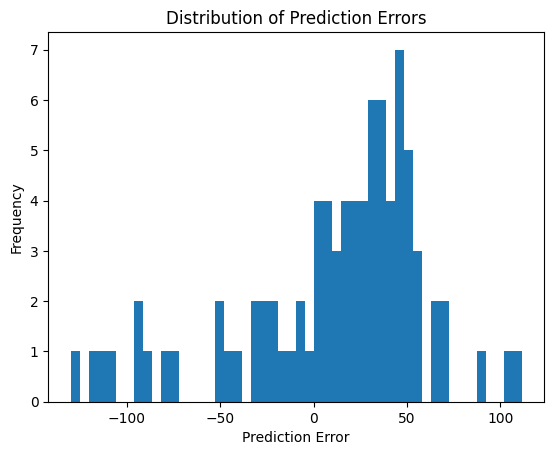

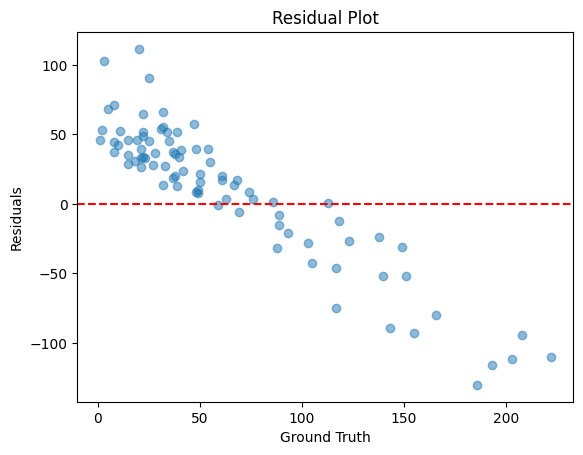

MAE : 41.6589
MSE : 2604.9399
RMSE: 51.0386
R²  : 0.1010
📉 Std: 20.0981 | Unique values (2 decimal): 84
✅ Prediction distribution looks ok.


In [6]:

with open("config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

loss_type = config["loss_type"]
learning_rate = config["lr"]
predictions = np.load("result/ensemble_predictions.npy")
predictions = np.expm1(predictions)
ground_truth = np.load("result/ground_truth.npy")
ground_truth = np.expm1(ground_truth)
train_log_path = f"./train_logs/kfold_results_{loss_type}_lr{learning_rate}_5fold.json"

evaluator = ModelEvaluator(predictions, ground_truth, train_log_path)
evaluator.plot_loss_curve()
evaluator.plot_prediction_vs_truth()
evaluator.plot_error_distribution()
evaluator.residual_plot()
evaluator.evaluate_metrics()
evaluator.check_prediction_std()